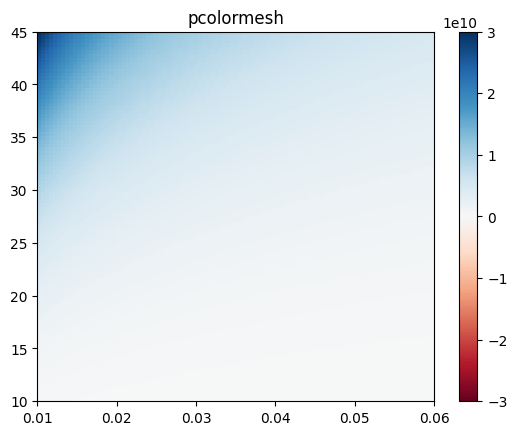

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin

D=110
L=110
l=86
l_0 = 12
teta = 0.785
P = 350
n = 3000

A_ef = D*(l+l_0) * sin(pi/4)


P_n = P/A_ef * ((2*0.35)/0.3)


def P_ny(ny, delta):
    return 0.055 * 10**-16 * ny * D**3 * (n**2/delta)*(pi*L - 2*l*teta)


def P_q(ny, delta):
    Q = 1.02 * 10**7 * ((P_n * delta**3 * pi * D )/(ny*l_0))
    return 10**-3 * Q * P_n

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(10, 45, 100), np.linspace(0.01, 0.06, 100))

z = (P_ny(x, y) + P_q(x, y)) 
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

[[13.872660706276267, 8.919191388686015, 6.574272943684057, 5.208514991710443, 4.31648388288488, 3.690263925183442, 3.228740744787063, 2.876918718919677, 2.6023910008262843, 2.3848817530965274], [19.267358787762937, 12.386916922225089, 9.128812714883901, 7.229771948748029, 5.987571420270086, 5.11320731181432, 4.466010969918384, 3.969367562012991, 3.578035555558113, 3.263622042103504], [24.662098172069687, 15.854797922071853, 11.683741095196154, 9.251812129633107, 7.66004076078149, 6.538377538006968, 5.706642020817174, 5.066642659462854, 4.560345728232205, 4.151283740248345], [30.05685661921647, 19.322750675599085, 14.23884883356029, 11.274213798447796, 9.333147856581903, 7.9645755363050466, 6.948824222070181, 6.166145258923432, 5.545732339956571, 5.04306301184143], [35.45162542660242, 22.7907424256918, 16.794054049126537, 13.2968119280938, 11.006601558517655, 9.39133210639956, 8.191849439820047, 7.26685845730288, 6.532790929425657, 5.937080095091172], [40.84640048922708, 26.25875772088

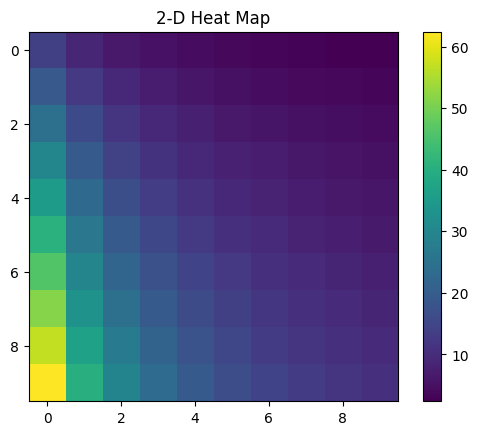

In [18]:
import numpy as np
import matplotlib.pyplot as plt
 

D=110
L=110
l=86
l_0 = 12
teta = 0.785
P = 350
n = 3000

A_ef = D*(l+l_0) * sin(pi/4)


P_n = P/A_ef * ((2*0.35)/0.3)


def P_ny(ny, delta):
    return 0.055 * 10**-16 * ny * D**3 * (n**2/delta)*(pi*L - 2*l*teta)


def P_q(ny, delta):
    Q = 1.02 * 10**7 * ((P_n * delta**3 * pi * D )/(ny*l_0))
    return 10**-3 * Q * P_n

def P_summ(ny, delta):
    return P_q(ny, delta) + P_ny(ny, delta)


data = []


ny = np.linspace(10, 45, 10)
delta = np.linspace(0.01, 0.06, 10)

for i in ny:
    slice = []
    for j in delta:
        slice.append(P_summ(i, j))
    data.append(slice)

print(data)

plt.imshow( data )
 
plt.title( "2-D Heat Map" )
plt.colorbar()
plt.show()